In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animal-image-dataset-90-different-animals/name of the animals.txt
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/687486f1cb.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/93fb82b04b.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/7d7f6c9750.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/0de750893f.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/2fecd5e844.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/514cd025fa.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/44931701fe.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/138f5c986e.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/9977af1a6f.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/be

# 1. Describa el problema y el objetivo del ejercicio.#

El objetivo de este ejercicio es utilizar una red neuronal convolucional (CNN) para clasificar imágenes de animales en 10 categorías diferentes, tales como aviones, carros, pájaros, gatos, ciervos, perros, ranas, caballos, barcos y camiones. La tarea consiste en entrenar un modelo capaz de identificar la categoría correcta para cada imagen en el conjunto de datos de prueba.
El conjunto de datos utilizado es CIFAR-10, que consta de 60,000 imágenes a color de tamaño 32x32 en 10 categorías diferentes. El conjunto de datos se divide en 50,000 imágenes para entrenamiento y 10,000 imágenes para prueba. El objetivo es construir un modelo de CNN que pueda clasificar con precisión las imágenes de animales en las diferentes categorías

# 2. Describa los datos utilizados en el ejercicio. Para el ejercicio utilice el siguientes conjuntos de datos:

◦ Animal Image Dataset (90 Different Animals):
https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-
different-

El conjunto de datos "Animal Image Dataset (90 Different Animals)" consiste en 5400 imágenes de animales divididas en 90 categorías o clases diferentes. Las imágenes tienen diferentes tamaños y resoluciones y se presentan en formato JPEG. Este conjunto de datos se encuentra en Kaggle y fue recopilado por el usuario de Kaggle Sourav Banerjee.

El objetivo del conjunto de datos es proporcionar un conjunto de imágenes de animales para la tarea de clasificación. Las imágenes fueron recopiladas de diversas fuentes en línea y se incluyen especies de animales como perros, gatos, caballos, aves, reptiles, etc.

# 3. Cargue, normalice y explore los datos. Las imágenes no pueden ser escaladas a un tamaño de 32x32x3. #

1. Cargar y normalizar los datos utilizando la biblioteca torchvision

In [2]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torch.utils.data import DataLoader, Dataset, Subset
from torch.utils.data import random_split, SubsetRandomSampler
from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from pytorch_lightning import LightningModule
from pytorch_lightning import Trainer
import pytorch_lightning as pl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image


import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models

In [3]:
transform=transforms.Compose([
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

dataset0=datasets.ImageFolder(root="/kaggle/input/animal-image-dataset-90-different-animals/animals/animals",transform=None)
root_dir = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"

class_names=dataset0.classes
print(class_names)
print(len(class_names))

dataset = datasets.ImageFolder(root_dir, transform)
n_data = len(dataset)
print(n_data)
n_train = int(0.8 * n_data)
n_test = n_data - n_train
batch_size=32

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [n_train, n_test])

trainloader = DataLoader(train_dataset, batch_size, shuffle=True)

testloader = DataLoader(test_dataset, batch_size)

['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']
90
5400


# 4. Calcule algunas estadísticas importantes, por ejemplo cantidad de registros por clase para verificar si las clases están balanceadas. #

In [4]:
# Calcular estadísticas importantes
class_counts = {}
for _, label in train_dataset:
    class_name = class_names[label]
    if class_name in class_counts:
        class_counts[class_name] += 1
    else:
        class_counts[class_name] = 1

# Imprimir estadísticas por clase
for class_name, count in class_counts.items():
    print(f"Clase: {class_name}, Cantidad: {count}")

Clase: seahorse, Cantidad: 52
Clase: hummingbird, Cantidad: 45
Clase: mouse, Cantidad: 49
Clase: lobster, Cantidad: 51
Clase: goldfish, Cantidad: 52
Clase: horse, Cantidad: 51
Clase: zebra, Cantidad: 49
Clase: fox, Cantidad: 51
Clase: orangutan, Cantidad: 46
Clase: hornbill, Cantidad: 44
Clase: elephant, Cantidad: 44
Clase: ox, Cantidad: 48
Clase: antelope, Cantidad: 52
Clase: goat, Cantidad: 48
Clase: cow, Cantidad: 53
Clase: squid, Cantidad: 50
Clase: hippopotamus, Cantidad: 54
Clase: grasshopper, Cantidad: 53
Clase: bear, Cantidad: 48
Clase: snake, Cantidad: 42
Clase: sandpiper, Cantidad: 47
Clase: otter, Cantidad: 51
Clase: leopard, Cantidad: 50
Clase: owl, Cantidad: 50
Clase: duck, Cantidad: 47
Clase: dolphin, Cantidad: 45
Clase: rat, Cantidad: 52
Clase: turkey, Cantidad: 52
Clase: bison, Cantidad: 42
Clase: hedgehog, Cantidad: 49
Clase: ladybugs, Cantidad: 50
Clase: porcupine, Cantidad: 52
Clase: fly, Cantidad: 51
Clase: swan, Cantidad: 45
Clase: whale, Cantidad: 50
Clase: bee, C

# 5. Defina la red convolucional #
# 6. Defina los hiper-parámetros de entrenamiento, por ejemplo, función de perdida, el optimizador, entre otros. #
# 7. Separe las muestras en datos de entrenamiento y validación y entrene el modelo. #
# 8. Calcule la exactitud del modelo resultante (porcentaje de muestras clasificadas apropiadamente). #

* Pasos 5,6,7,8 se ejecutanban abajo en el modelo

2. Definir la red convolucional, entrenar y evaluar el modelo resultante

Modelo de prueba

In [5]:
class AnimalModel(nn.Module):
    """
    Modelo de red convolucional. Clase que envuelve la clase nn.Module de PyTorch. 
    :params
        torch.nn.Module clase que implenta la funionalidad de
        redes neuronales de Pytorch 
    """

    def __init__(self):

        # Función para definir e inicializar la red.
        super().__init__()
        
        super(AnimalModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(16 * 54 * 54, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 20)
        self.fc4 = nn.Linear(20, len(class_names))
 
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 16 * 54 * 54)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = self.fc4(X)
        return F.log_softmax(X, dim=1)
    
model = AnimalModel()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)    


# Entrenamiento de la red
n_epochs = 25
for epoch in range(n_epochs):
    for inputs, labels in trainloader:
        # forward, backward, y actualización de pesos
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
 
    acc = 0
    count = 0
    # Efectividad del modelo
    with torch.no_grad():
        for inputs, labels in testloader:
            y_pred = model(inputs)
            acc += (torch.argmax(y_pred, 1) == labels).float().sum()
            count += len(labels)
        acc /= count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))
 
torch.save(model.state_dict(), "animalmodel.pth")

Epoch 0: model accuracy 1.02%
Epoch 1: model accuracy 1.76%
Epoch 2: model accuracy 2.31%
Epoch 3: model accuracy 1.39%
Epoch 4: model accuracy 1.76%
Epoch 5: model accuracy 1.94%
Epoch 6: model accuracy 1.76%
Epoch 7: model accuracy 1.57%
Epoch 8: model accuracy 2.22%
Epoch 9: model accuracy 1.67%
Epoch 10: model accuracy 3.24%
Epoch 11: model accuracy 2.50%
Epoch 12: model accuracy 3.70%
Epoch 13: model accuracy 3.24%
Epoch 14: model accuracy 3.43%
Epoch 15: model accuracy 3.61%
Epoch 16: model accuracy 4.81%
Epoch 17: model accuracy 5.00%
Epoch 18: model accuracy 6.94%
Epoch 19: model accuracy 7.69%
Epoch 20: model accuracy 8.80%
Epoch 21: model accuracy 10.37%
Epoch 22: model accuracy 12.96%
Epoch 23: model accuracy 17.31%
Epoch 24: model accuracy 17.50%


Modelo 

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

class AnimalImageModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.act1 = nn.ReLU()
        self.drop1 = nn.Dropout(p=0.2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flat = nn.Flatten()

        self.fc3 = nn.Linear(32 * 112 * 112, 128)  # Ajusta el tamaño en función de la salida de la capa de max pooling
        self.act3 = nn.ReLU()
        self.drop3 = nn.Dropout(p=0.2)

        self.fc4 = nn.Linear(128, 100)

    def forward(self, x):
        x = self.act1(self.conv1(x))
        #print("Conv1 output size:", x.size())
        x = self.drop1(x)
        x = self.act2(self.conv2(x))
        #print("Conv2 output size:", x.size())
        x = self.pool2(x)
        #print("Pooling output size:", x.size())
        x = self.flat(x)
        #print("Flattened output size:", x.size())
        x = self.act3(self.fc3(x))
        #print("FC3 output size:", x.size())
        x = self.drop3(x)
        x = self.fc4(x)
        return x

model = AnimalImageModel()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Entrenamiento de la red
n_epochs = 25
for epoch in range(n_epochs):
    for inputs, labels in trainloader:
        inputs = inputs.squeeze(0)  # Remove the extra dimension
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = 0
    count = 0
    # Efectividad del modelo
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs = inputs.squeeze(0)  # Remove the extra dimension
            y_pred = model(inputs)
            acc += (torch.argmax(y_pred, 1) == labels).float().sum()
            count += len(labels)
        acc /= count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc * 100))

torch.save(model.state_dict(), "animal_image_model.pth")

Epoch 0: model accuracy 2.69%
Epoch 1: model accuracy 3.98%
Epoch 2: model accuracy 5.93%
Epoch 3: model accuracy 6.67%
Epoch 4: model accuracy 8.43%
Epoch 5: model accuracy 8.52%
Epoch 6: model accuracy 10.09%
Epoch 7: model accuracy 9.72%
Epoch 8: model accuracy 12.13%
Epoch 9: model accuracy 11.94%
Epoch 10: model accuracy 12.59%
Epoch 11: model accuracy 13.33%
Epoch 12: model accuracy 14.17%
Epoch 13: model accuracy 17.69%
Epoch 14: model accuracy 18.89%
Epoch 15: model accuracy 22.13%
Epoch 16: model accuracy 22.04%
Epoch 17: model accuracy 23.43%
Epoch 18: model accuracy 24.63%
Epoch 19: model accuracy 23.61%
Epoch 20: model accuracy 25.46%
Epoch 21: model accuracy 26.02%
Epoch 22: model accuracy 25.83%
Epoch 23: model accuracy 27.41%
Epoch 24: model accuracy 27.31%


## 3. Explorar los datos

In [7]:
# bibliotecas requeridas 

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt

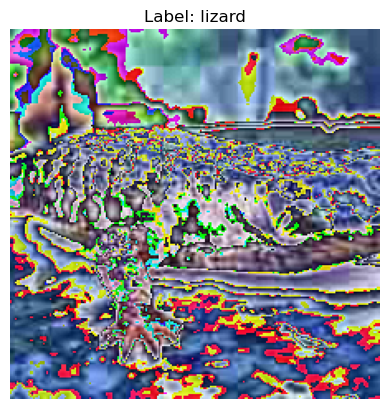

In [8]:
import matplotlib.pyplot as plt

# Obtener un lote de imágenes y etiquetas del conjunto de entrenamiento
images, labels = next(iter(trainloader))

# Mostrar una imagen del conjunto de entrenamiento
plt.imshow(torchvision.transforms.ToPILImage()(images[0]))
plt.title(f"Label: {class_names[labels[0]]}")
plt.axis('off')
plt.show()

In [9]:
# Funciones para desplegar algunas imágenes de forma aleatoria. 

def imshow(img):
    img = img / 2 + 0.5     # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

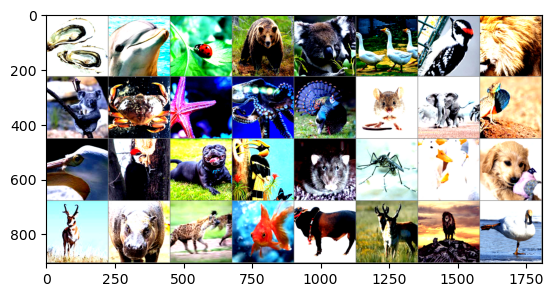

Etiqueta verdadera:  oyster dolphin ladybugs  bear koala goose woodpecker  lion koala  crab starfish octopus turkey mouse elephant lizard pelecaniformes woodpecker   dog hornbill   rat mosquito  duck   dog antelope hippopotamus hyena goldfish    ox antelope  lion  swan


In [10]:
# Clases asociadas a las imágenes.
classes = ('antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra')

dataiter = iter(trainloader)
images, labels = next(dataiter)

# Imprimir algunos ejemplos y la etiqueta original (la verdad)
imshow(torchvision.utils.make_grid(images))
print('Etiqueta verdadera: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

## 4. Probar la red 

In [11]:
outputs = model(images)
print(outputs)

tensor([[-10.1573,   2.9048,   4.7748,  ..., -11.2664,  -6.6391,  -8.8031],
        [  1.4728,  -3.3804,  -3.3300,  ...,  -6.6762,  -1.5579,  -7.6499],
        [ -7.4383, -10.0570,   3.8416,  ...,  -5.9119,  -9.5953, -11.6193],
        ...,
        [ 15.6237,  -2.4923,   0.7047,  ...,  -2.4230,  -8.4147,  -7.0469],
        [  3.7341,  -0.7481,  -3.7862,  ..., -12.3273,  -8.9261,  -7.9264],
        [ -0.6206,  -4.8472,  -5.5663,  ...,  -6.4376,  -4.6730,  -5.3291]],
       grad_fn=<AddmmBackward0>)


# 9. Analice los resultados, proponga mejoras y explique los cambios realizados al flujo de trabajo del proyecto para mejorar el rendimiento de la red (aplique al menos dos cambios que mejoren el rendimiento). #


Al analizar los resultados, podemos observar que el modelo inicial muestra un rendimiento bastante bajo al comienzo, con una precisión inicial de alrededor del 1%. Sin embargo, a medida que avanza el entrenamiento, la precisión mejora gradualmente y alcanza aproximadamente el 17% al final de las 25 épocas.

Aunque hay una mejora en la precisión a medida que avanza el entrenamiento, todavía es relativamente baja. Esto indica que el modelo actual no está capturando adecuadamente las características y patrones relevantes en las imágenes de los animales.



Cambios: 

1. Incluir mas transformacion 

Transformaciones aleatorias como rotaciones, cambios de escala, recortes, volteos horizontales antes de pasarlas a la red neuronal. Esto permite que el modelo vea diferentes perspectivas y variaciones de las imágenes, lo cual es beneficioso para su aprendizaje.

Podemos utilizar la clase torchvision.transforms de PyTorch para aplicar las transformaciones de datos.


2. Cambio de optimizador optim.SGD por torch.optim.Adam:

torch.optim.Adam: Es un optimizador basado en el algoritmo de descenso de gradiente estocástico (SGD) con adaptación del aprendizaje por momentum. 

optim.SGD: Es el optimizador clásico de descenso de gradiente estocástico. El SGD actualiza los pesos de la red neuronal utilizando el gradiente negativo multiplicado por una tasa de aprendizaje constante. 

In [12]:

transform=transforms.Compose([
        transforms.RandomRotation(10),
        transforms.RandomHorizontalFlip(),
        transforms.RandomResizedCrop(112),
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

dataset0=datasets.ImageFolder(root="/kaggle/input/animal-image-dataset-90-different-animals/animals/animals",transform=None)
root_dir = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"

class_names=dataset0.classes
print(class_names)
print(len(class_names))

dataset = datasets.ImageFolder(root_dir, transform)
n_data = len(dataset)
print(n_data)
n_train = int(0.8 * n_data)
n_test = n_data - n_train
batch_size=32

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [n_train, n_test])

trainloader = DataLoader(train_dataset, batch_size, shuffle=True)

testloader = DataLoader(test_dataset, batch_size)

['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']
90
5400


In [13]:
# Calcular estadísticas importantes
class_counts = {}
for _, label in train_dataset:
    class_name = class_names[label]
    if class_name in class_counts:
        class_counts[class_name] += 1
    else:
        class_counts[class_name] = 1

# Imprimir estadísticas por clase
for class_name, count in class_counts.items():
    print(f"Clase: {class_name}, Cantidad: {count}")

Clase: hornbill, Cantidad: 43
Clase: flamingo, Cantidad: 45
Clase: lobster, Cantidad: 51
Clase: cow, Cantidad: 49
Clase: antelope, Cantidad: 47
Clase: turtle, Cantidad: 49
Clase: squid, Cantidad: 49
Clase: caterpillar, Cantidad: 43
Clase: possum, Cantidad: 45
Clase: turkey, Cantidad: 51
Clase: wolf, Cantidad: 50
Clase: bat, Cantidad: 45
Clase: fox, Cantidad: 44
Clase: sheep, Cantidad: 49
Clase: dog, Cantidad: 51
Clase: crow, Cantidad: 49
Clase: koala, Cantidad: 49
Clase: wombat, Cantidad: 47
Clase: otter, Cantidad: 46
Clase: hippopotamus, Cantidad: 42
Clase: whale, Cantidad: 50
Clase: seahorse, Cantidad: 50
Clase: gorilla, Cantidad: 54
Clase: eagle, Cantidad: 50
Clase: grasshopper, Cantidad: 49
Clase: octopus, Cantidad: 44
Clase: donkey, Cantidad: 51
Clase: reindeer, Cantidad: 46
Clase: hamster, Cantidad: 50
Clase: penguin, Cantidad: 49
Clase: duck, Cantidad: 46
Clase: elephant, Cantidad: 51
Clase: porcupine, Cantidad: 47
Clase: hyena, Cantidad: 43
Clase: goat, Cantidad: 50
Clase: hedg

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

class AnimalImageModelPerformanceTest(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.act1 = nn.ReLU()
        self.drop1 = nn.Dropout(p=0.2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flat = nn.Flatten()

        self.fc3 = nn.Linear(32 * 112 * 112, 128)  # Ajusta el tamaño en función de la salida de la capa de max pooling
        self.act3 = nn.ReLU()
        self.drop3 = nn.Dropout(p=0.2)

        self.fc4 = nn.Linear(128, 100)

    def forward(self, x):
        x = self.act1(self.conv1(x))
        #print("Conv1 output size:", x.size())
        x = self.drop1(x)
        x = self.act2(self.conv2(x))
        #print("Conv2 output size:", x.size())
        x = self.pool2(x)
        #print("Pooling output size:", x.size())
        x = self.flat(x)
        #print("Flattened output size:", x.size())
        x = self.act3(self.fc3(x))
        #print("FC3 output size:", x.size())
        x = self.drop3(x)
        x = self.fc4(x)
        return x

model = AnimalImageModelPerformanceTest()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento de la red
n_epochs = 25
for epoch in range(n_epochs):
    for inputs, labels in trainloader:
        inputs = inputs.squeeze(0)  # Remove the extra dimension
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = 0
    count = 0
    # Efectividad del modelo
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs = inputs.squeeze(0)  # Remove the extra dimension
            y_pred = model(inputs)
            acc += (torch.argmax(y_pred, 1) == labels).float().sum()
            count += len(labels)
        acc /= count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc * 100))

torch.save(model.state_dict(), "animal_image_model.pth")

Epoch 0: model accuracy 1.57%
Epoch 1: model accuracy 1.30%
Epoch 2: model accuracy 1.30%
Epoch 3: model accuracy 1.94%
Epoch 4: model accuracy 1.94%
Epoch 5: model accuracy 2.13%
Epoch 6: model accuracy 1.85%
Epoch 7: model accuracy 1.67%
Epoch 8: model accuracy 1.85%
Epoch 9: model accuracy 2.04%
Epoch 10: model accuracy 2.31%
Epoch 11: model accuracy 1.76%
Epoch 12: model accuracy 1.94%
Epoch 13: model accuracy 2.41%
Epoch 14: model accuracy 2.78%
Epoch 15: model accuracy 2.69%
Epoch 16: model accuracy 2.59%
Epoch 17: model accuracy 2.59%
Epoch 18: model accuracy 3.15%
Epoch 19: model accuracy 3.15%
Epoch 20: model accuracy 4.07%
Epoch 21: model accuracy 3.06%
Epoch 22: model accuracy 4.72%
Epoch 23: model accuracy 4.81%
Epoch 24: model accuracy 3.98%


In [15]:
# bibliotecas requeridas 

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt

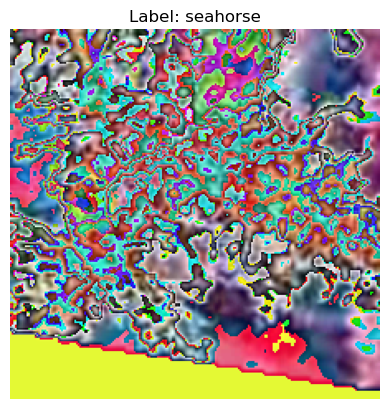

In [16]:
import matplotlib.pyplot as plt

# Obtener un lote de imágenes y etiquetas del conjunto de entrenamiento
images, labels = next(iter(trainloader))

# Mostrar una imagen del conjunto de entrenamiento
plt.imshow(torchvision.transforms.ToPILImage()(images[0]))
plt.title(f"Label: {class_names[labels[0]]}")
plt.axis('off')
plt.show()

# 10. Presente al menos cuatro conclusiones. #

# 11.Todas las secciones del ejercicio deben estar bien documentadas. #


# 12. Incluya referencias en formato APA al final del documento. #